In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore' )

from keras.models import *
from keras.layers import *

from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import os


In [7]:
train_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/train'
test_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test'
val_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/validation'

In [8]:
os.listdir('/kaggle/input/vegetable-image-dataset/Vegetable Images')

['validation', 'test', 'train']

In [9]:
classes = os.listdir(train_path)

In [10]:
classes, len(classes)

(['Broccoli',
  'Capsicum',
  'Bottle_Gourd',
  'Radish',
  'Tomato',
  'Brinjal',
  'Pumpkin',
  'Carrot',
  'Papaya',
  'Cabbage',
  'Bitter_Gourd',
  'Cauliflower',
  'Bean',
  'Cucumber',
  'Potato'],
 15)

In [11]:
data_gen = ImageDataGenerator(
    rescale = 1/255
)


In [12]:
train_data = data_gen.flow_from_directory(
    train_path,
    target_size = [150, 150],
    class_mode = 'categorical'
)

Found 15000 images belonging to 15 classes.


In [13]:
test_data = data_gen.flow_from_directory(
    test_path,
    target_size = [150, 150],
    class_mode = 'categorical'
)

Found 3000 images belonging to 15 classes.


In [14]:
val_data = data_gen.flow_from_directory(
    val_path,
    target_size = [150, 150],
    class_mode = 'categorical'
)

Found 3000 images belonging to 15 classes.


In [15]:
# build CNN Model 

model = Sequential()

# input layer
model.add(Conv2D(128, kernel_size=(3, 3), input_shape=(150, 150, 3), activation = 'relu'))

# hidden layers
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(1, 1), activation = 'relu'))  #  3D 

model.add(Flatten())                                      # (1)  3D -> 1D
model.add(Dense(512 , activation = 'relu'))               # (2)  1D 

# output layer
model.add(Dense(15, activation='softmax'))   #pred class  # (3)

# 1, 2, 3 fully connected layer


I0000 00:00:1764074168.117008      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         7,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,483,887 (36.18 MB)

 Trainable params: 9,483,887 (36.18 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
hist = model.fit(train_data, epochs=5 , batch_size=128 , validation_data=val_data )

Epoch 1/5


I0000 00:00:1764074189.100347     131 service.cc:148] XLA service 0x7f5b7c006b00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764074189.101081     131 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1764074189.413767     131 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/469 ━━━━━━━━━━━━━━━━━━━━ 35:02 4s/step - accuracy: 0.1562 - loss: 2.6941

I0000 00:00:1764074191.920617     131 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 154s 318ms/step - accuracy: 0.5158 - loss: 1.4749 - val_accuracy: 0.8703 - val_loss: 0.4084
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9161 - loss: 0.2743 - val_accuracy: 0.8993 - val_loss: 0.3076
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9663 - loss: 0.1155 - val_accuracy: 0.9193 - val_loss: 0.2912
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 63ms/step - accuracy: 0.9739 - loss: 0.0808 - val_accuracy: 0.9553 - val_loss: 0.1563
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 63ms/step - accuracy: 0.9814 - loss: 0.0657 - val_accuracy: 0.9467 - val_loss: 0.2190


In [1]:
model.evaluate(test_data)

NameError: name 'model' is not defined

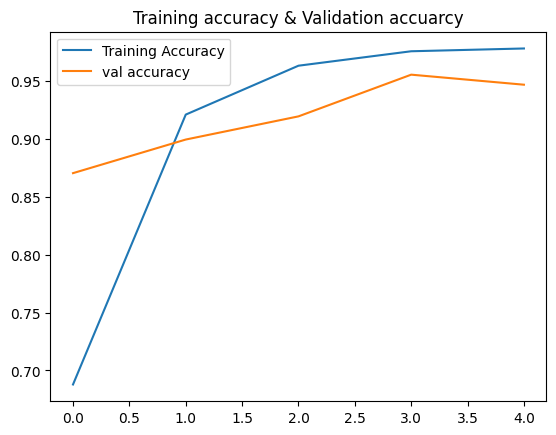

In [19]:
plt.plot(hist.history['accuracy'] , label ='Training Accuracy') # training accuracy
plt.plot(hist.history['val_accuracy'] , label = 'val accuracy') # val accuracy
plt.legend()
plt.title('Training accuracy & Validation accuarcy');

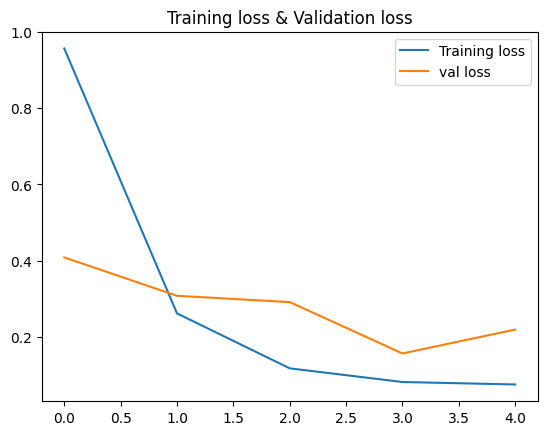

In [20]:
# training loss & validation loss
plt.plot(hist.history['loss'] , label ='Training loss') # training loss
plt.plot(hist.history['val_loss'] , label = 'val loss') # val loss
plt.legend()
plt.title('Training loss & Validation loss');